<a href="https://colab.research.google.com/github/soumitrahazra/My_Data_Analysis_Codes/blob/main/Sunspot_Time_Series_Data_Analysis_Asymmetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import time
import math
import pandas as pd
# import seaborn as sns
from scipy import special
from scipy.signal import find_peaks
import datetime
import csv
import scipy.stats
import matplotlib
from scipy.optimize import curve_fit

# import subprocess
# import cv2
# import glob
# import re
# from mpl_toolkits.mplot3d import axes3d
# from matplotlib import rc
# import matplotlib.style
#plt.ion()
## Plotting canvas properties.
params = {'legend.fontsize': 16,
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize' :15,
          'ytick.labelsize': 15,
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'DejaVu serif',
          'font.family'      : 'DejaVu serif',
          'font.serif'       : "Times New Roman", # or "Times"
         }
matplotlib.rcParams.update(params)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Yearly sunspot data set

In [4]:
df=np.loadtxt('/content/drive/MyDrive/Sunspot_Data/SN_y_tot_V2.0.txt')
df

array([[ 1.7535e+03,  5.1200e+01, -1.0000e+00, -1.0000e+00],
       [ 1.7545e+03,  2.0300e+01, -1.0000e+00, -1.0000e+00],
       [ 1.7555e+03,  1.6000e+01, -1.0000e+00, -1.0000e+00],
       ...,
       [ 2.0215e+03,  2.9600e+01,  7.9000e+00,  1.5233e+04],
       [ 2.0225e+03,  8.3200e+01,  1.4200e+01,  1.5258e+04],
       [ 2.0235e+03,  1.2530e+02,  1.9200e+01,  1.2855e+04]])

Loading the 13-month smoothed data set

In [5]:
da=np.loadtxt('/content/drive/MyDrive/Sunspot_Data/SN_ms_tot_V2.0.txt')
da

array([[ 1.753000e+03,  1.200000e+01,  1.753958e+03,  2.900000e+01,
        -1.000000e+00, -1.000000e+00],
       [ 1.754000e+03,  1.000000e+00,  1.754042e+03,  2.850000e+01,
        -1.000000e+00, -1.000000e+00],
       [ 1.754000e+03,  2.000000e+00,  1.754123e+03,  2.640000e+01,
        -1.000000e+00, -1.000000e+00],
       ...,
       [ 2.023000e+03,  1.000000e+00,  2.023042e+03,  1.133000e+02,
         1.860000e+01,  9.680000e+02],
       [ 2.023000e+03,  2.000000e+00,  2.023122e+03,  1.178000e+02,
         1.890000e+01,  1.014000e+03],
       [ 2.023000e+03,  3.000000e+00,  2.023204e+03,  1.211000e+02,
         1.910000e+01,  1.081000e+03]])

In [6]:
time_year=df[:,0]
sunspot_number=df[:,1]
frac_time_year=da[:,2]
sunspot_number_13=da[:,3]
frac_time_year, sunspot_number_13

(array([1753.958, 1754.042, 1754.123, ..., 2023.042, 2023.122, 2023.204]),
 array([ 29. ,  28.5,  26.4, ..., 113.3, 117.8, 121.1]))

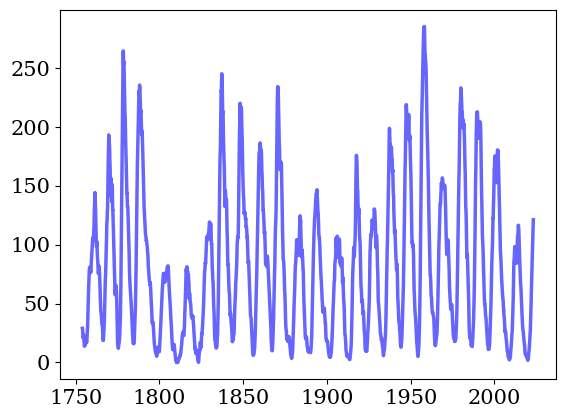

In [7]:
plt.plot(frac_time_year,sunspot_number_13,linewidth = 2.5, alpha=0.6, color='blue', linestyle='-')

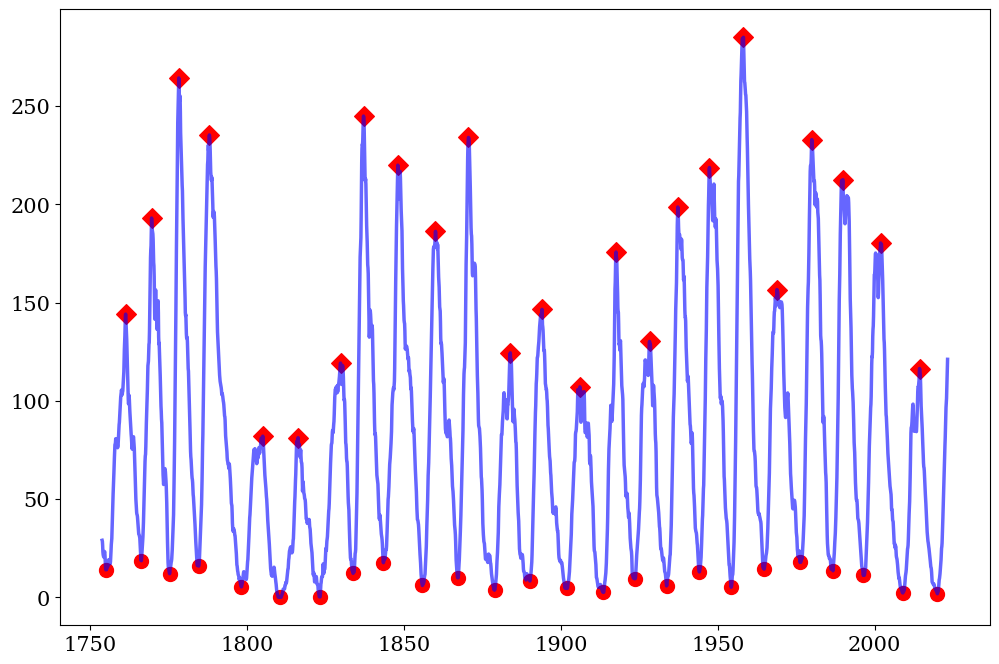

In [8]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(frac_time_year,sunspot_number_13,linewidth = 2.5, alpha=0.6, color='blue', linestyle='-')

peaks1 = find_peaks(sunspot_number_13, height = 50, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks
peak_pos1 = frac_time_year[peaks1[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos1, height1, color = 'r', s = 100, marker = 'D')

peaks2 = find_peaks(-np.abs(sunspot_number_13), height = -20, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks
peak_pos2 = frac_time_year[peaks2[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos2, -height2, color = 'r', s = 400, marker = '.')

In [9]:
peak_pos1, peak_pos2

(array([1761.455, 1769.707, 1778.371, 1788.124, 1805.123, 1816.373,
        1829.874, 1837.204, 1848.124, 1860.124, 1870.623, 1883.958,
        1894.042, 1906.123, 1917.623, 1928.29 , 1937.288, 1947.371,
        1958.204, 1968.874, 1979.958, 1989.874, 2001.874, 2014.288]),
 array([1755.123, 1766.455, 1775.455, 1784.708, 1798.288, 1810.538,
        1823.288, 1833.874, 1843.538, 1855.958, 1867.204, 1878.958,
        1890.204, 1902.042, 1913.538, 1923.538, 1933.707, 1944.124,
        1954.288, 1964.791, 1976.206, 1986.707, 1996.373, 2008.958,
        2019.958]))

In [10]:
peak_rise1=peak_pos1[0:24]
peak_rise2=peak_pos2[0:24]
peak_rise1, peak_rise2

(array([1761.455, 1769.707, 1778.371, 1788.124, 1805.123, 1816.373,
        1829.874, 1837.204, 1848.124, 1860.124, 1870.623, 1883.958,
        1894.042, 1906.123, 1917.623, 1928.29 , 1937.288, 1947.371,
        1958.204, 1968.874, 1979.958, 1989.874, 2001.874, 2014.288]),
 array([1755.123, 1766.455, 1775.455, 1784.708, 1798.288, 1810.538,
        1823.288, 1833.874, 1843.538, 1855.958, 1867.204, 1878.958,
        1890.204, 1902.042, 1913.538, 1923.538, 1933.707, 1944.124,
        1954.288, 1964.791, 1976.206, 1986.707, 1996.373, 2008.958]))

In [11]:
peak_decay1=peak_pos1[0:24]
peak_decay2=peak_pos2[1:25]
peak_decay1, peak_decay2

(array([1761.455, 1769.707, 1778.371, 1788.124, 1805.123, 1816.373,
        1829.874, 1837.204, 1848.124, 1860.124, 1870.623, 1883.958,
        1894.042, 1906.123, 1917.623, 1928.29 , 1937.288, 1947.371,
        1958.204, 1968.874, 1979.958, 1989.874, 2001.874, 2014.288]),
 array([1766.455, 1775.455, 1784.708, 1798.288, 1810.538, 1823.288,
        1833.874, 1843.538, 1855.958, 1867.204, 1878.958, 1890.204,
        1902.042, 1913.538, 1923.538, 1933.707, 1944.124, 1954.288,
        1964.791, 1976.206, 1986.707, 1996.373, 2008.958, 2019.958]))

In [12]:
t_rise=peak_rise1-peak_rise2
t_decay=abs(peak_decay1-peak_decay2)
total_cycle_length=t_rise+t_decay
t_rise, t_decay, total_cycle_length

(array([6.332, 3.252, 2.916, 3.416, 6.835, 5.835, 6.586, 3.33 , 4.586,
        4.166, 3.419, 5.   , 3.838, 4.081, 4.085, 4.752, 3.581, 3.247,
        3.916, 4.083, 3.752, 3.167, 5.501, 5.33 ]),
 array([ 5.   ,  5.748,  6.337, 10.164,  5.415,  6.915,  4.   ,  6.334,
         7.834,  7.08 ,  8.335,  6.246,  8.   ,  7.415,  5.915,  5.417,
         6.836,  6.917,  6.587,  7.332,  6.749,  6.499,  7.084,  5.67 ]),
 array([11.332,  9.   ,  9.253, 13.58 , 12.25 , 12.75 , 10.586,  9.664,
        12.42 , 11.246, 11.754, 11.246, 11.838, 11.496, 10.   , 10.169,
        10.417, 10.164, 10.503, 11.415, 10.501,  9.666, 12.585, 11.   ]))

In [13]:
cycle_number = np.array(list(range(1,25,1)))
print(cycle_number)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


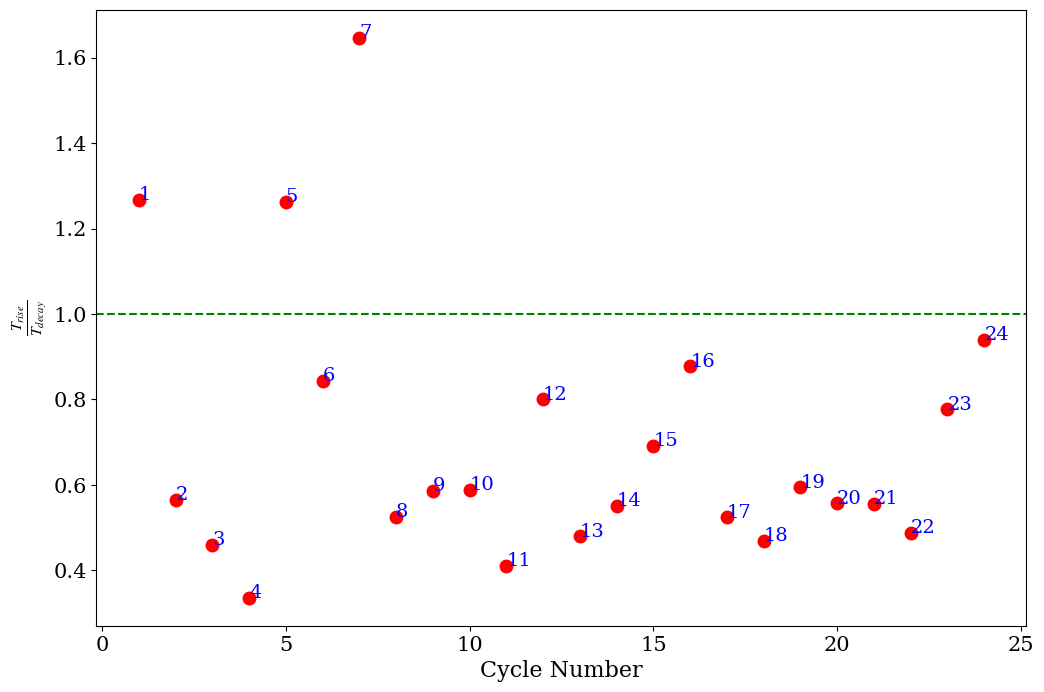

In [14]:
plt.plot(cycle_number, t_rise/t_decay, marker = 'o', ls = ' ', color = 'red', markersize = 9)
plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y in zip(cycle_number, t_rise/t_decay):
    plt.text(x, y, str(x), color="blue", fontsize=14)

plt.xlabel('Cycle Number')
plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('fig1.png', bbox_inches='tight')

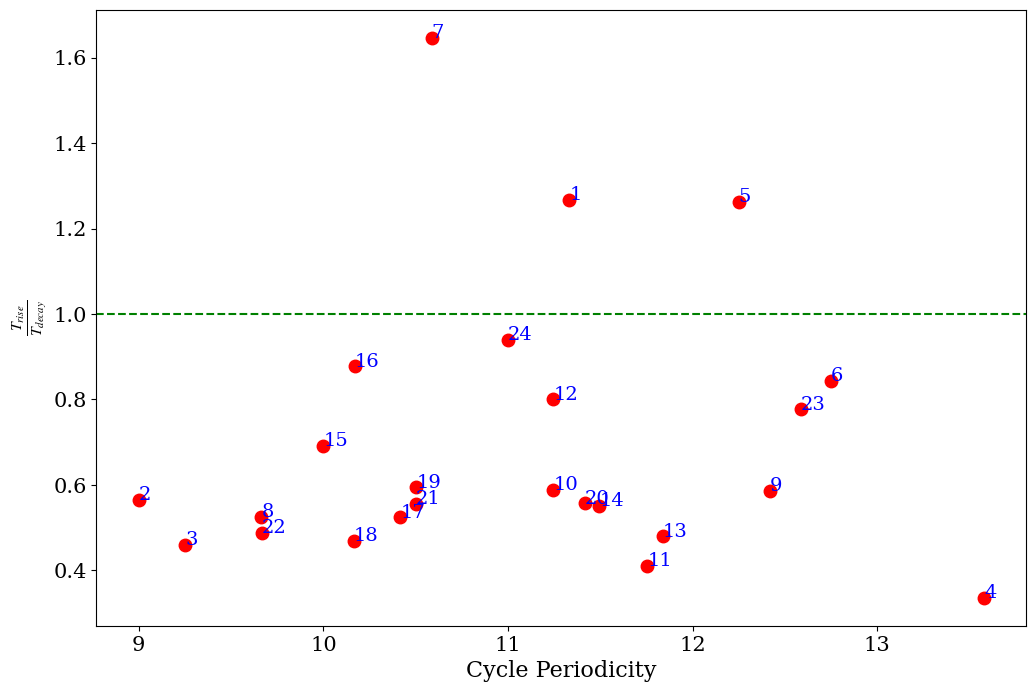

In [15]:
plt.plot(total_cycle_length, t_rise/t_decay, marker = 'o', ls = ' ', color = 'red', markersize = 9)
plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y, z in zip(total_cycle_length, t_rise/t_decay, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)

plt.xlabel('Cycle Periodicity')
plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('fig1aw.png', bbox_inches='tight')

In [16]:
first_quart, second_quart, third_quart = np.percentile(t_rise/t_decay, np.arange(25, 100, 25)) # quartiles
first_quart, second_quart

(0.5147096999034045, 0.575579495832919)

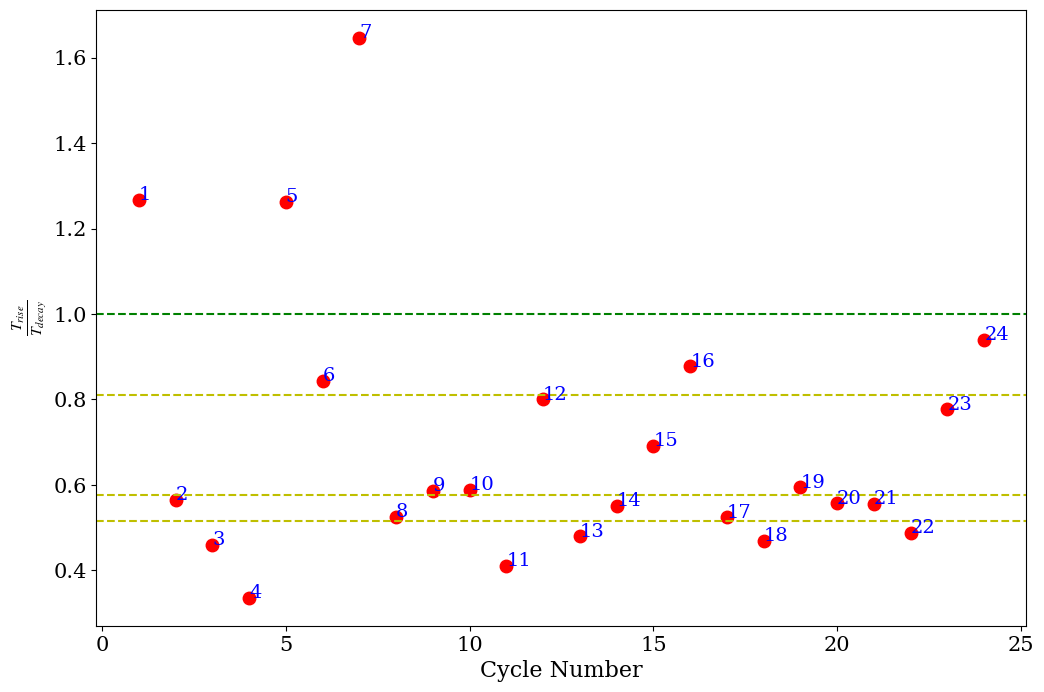

In [17]:
plt.plot(cycle_number, t_rise/t_decay, marker = 'o', ls = ' ', color = 'red', markersize = 9)
plt.axhline(y=1.0, color='g', linestyle='--')
plt.axhline(y=first_quart, color='y', linestyle='--')
plt.axhline(y=second_quart, color='y', linestyle='--')
plt.axhline(y=third_quart, color='y',linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y in zip(cycle_number, t_rise/t_decay):
    plt.text(x, y, str(x), color="blue", fontsize=14)

plt.xlabel('Cycle Number')
plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('figf.png', bbox_inches='tight')

In [18]:
import seaborn as sns

sns.set_style('darkgrid')

<ipython-input-19-a1a9e70a412f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_rise, color='red', label='t_rise')
<ipython-input-19-a1a9e70a412f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_decay)
<ipython-input-19-a1a9e70a412f>:3: UserWarning: 

`distplot` is a deprecated function an

<Axes: ylabel='Density'>

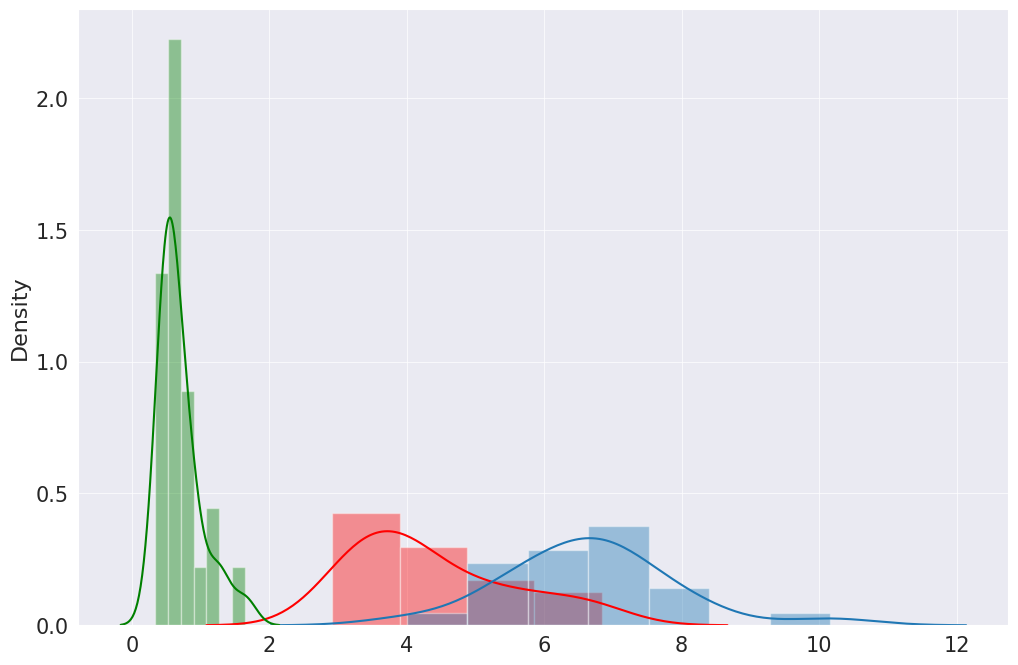

In [19]:
sns.distplot(t_rise, color='red', label='t_rise')
sns.distplot(t_decay)
sns.distplot(t_rise/t_decay, color='green')

In [20]:
cycle_amplitude=height1

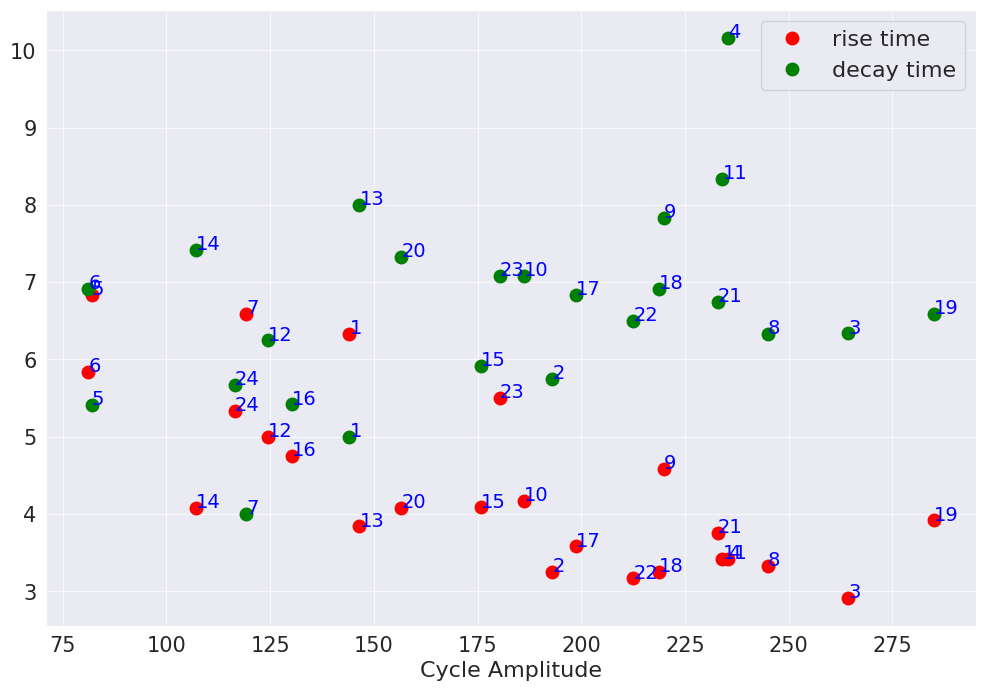

In [21]:
plt.plot(cycle_amplitude, t_rise, marker = 'o', ls='', color = 'red', markersize = 9, label='rise time')
plt.plot(cycle_amplitude, t_decay, marker='o', ls='', color='green', markersize=9, label='decay time')
#plt.scatter(cycle_amplitude, t_rise, label='rise time')
plt.legend()
#plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y, z in zip(cycle_amplitude, t_rise, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)

for x, y, z in zip(cycle_amplitude, t_decay, cycle_number):
    plt.text(x, y, str(z), color='blue', fontsize=14)

#plt.gca().set_facecolor('white')
plt.xlabel('Cycle Amplitude')
#plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('fig1awsa.png', bbox_inches='tight')


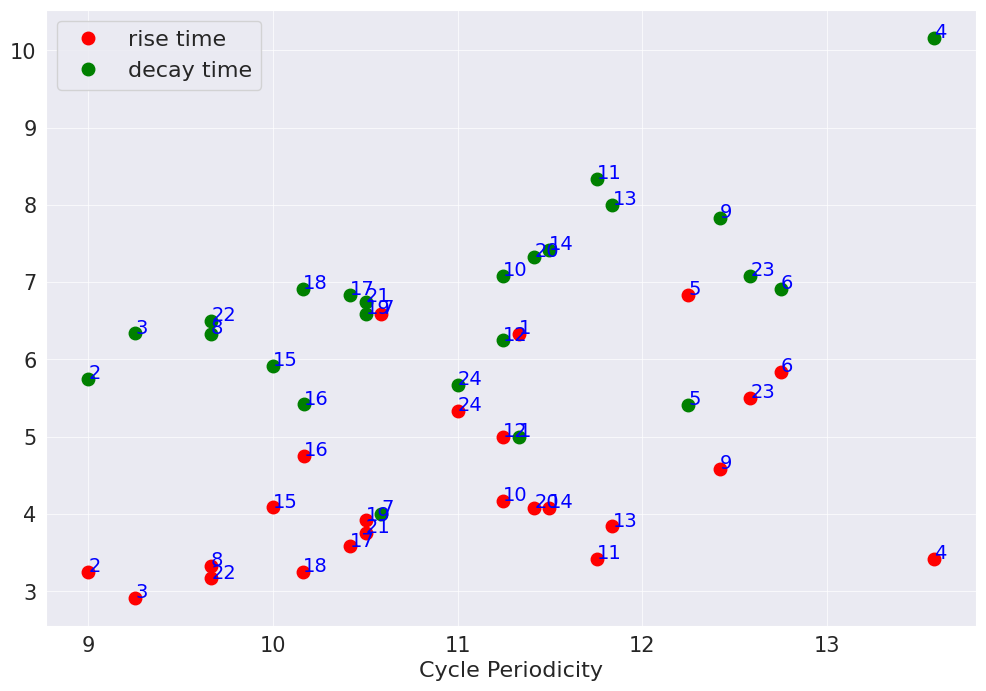

In [22]:
plt.plot(total_cycle_length, t_rise, marker = 'o', ls='', color = 'red', markersize = 9, label='rise time')
plt.plot(total_cycle_length, t_decay, marker='o', ls='', color='green', markersize=9, label='decay time')
#plt.scatter(cycle_amplitude, t_rise, label='rise time')
plt.legend()
#plt.axhline(y=1.0, color='g', linestyle='--')
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )
#plt.scatter(cycle_number, t_rise/t_decay)
#for i, txt in enumerate(an):
#    plt.annotate(txt, (cycle_number[i], t_rise/t_decay[i]) )

for x, y, z in zip(total_cycle_length, t_rise, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)

for x, y, z in zip(total_cycle_length, t_decay, cycle_number):
    plt.text(x, y, str(z), color='blue', fontsize=14)

#plt.gca().set_facecolor('white')
plt.xlabel('Cycle Periodicity')
#plt.ylabel(r'$\frac{T_{rise}}{T_{decay}}$')
plt.savefig('fig1awsbb.png', bbox_inches='tight')

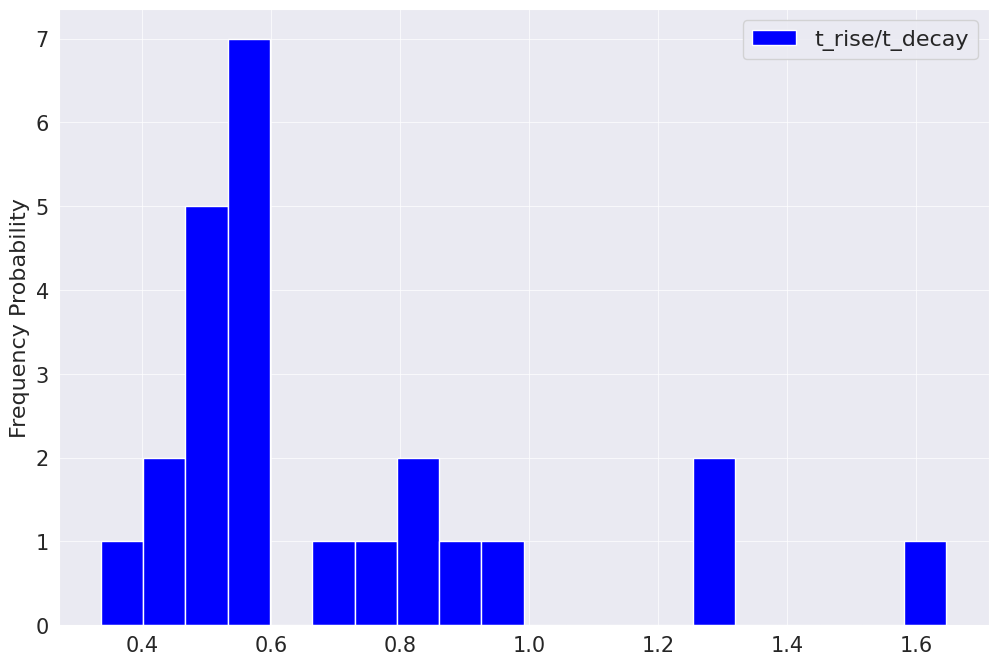

In [23]:
num_bins = 20
# the histogram of the data
#n, bins, patches = plt.hist(vpol, num_bins, facecolor='blue')
#n, bins, patches = plt.hist(t_rise, num_bins, facecolor='blue', histtype='step', label='rise time')
n, bins, patches = plt.hist(t_rise/t_decay, num_bins, facecolor='blue', histtype='bar', label='t_rise/t_decay')
#n1, bins1, patches1 = plt.hist(t_decay, num_bins, facecolor='red', histtype='step', label='Decay Time')
# your existing code can be inserted here
#pylab.gca().yaxis.set_major_formatter(yfmt)
plt.legend()
#plt.xlabel('Rise Time')
plt.ylabel('Frequency Probability')
plt.savefig('trise_tdecay.png', dpi=500)

Text(0, 0.5, 'Frequency Probability')

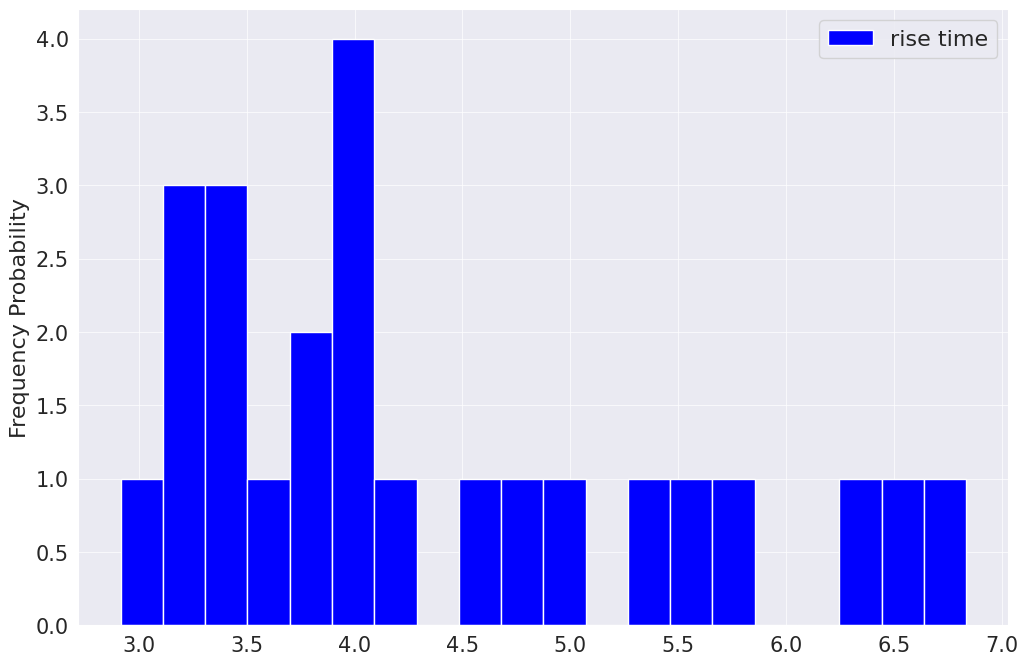

In [24]:
num_bins = 20
# the histogram of the data
#n, bins, patches = plt.hist(vpol, num_bins, facecolor='blue')
#n, bins, patches = plt.hist(t_rise, num_bins, facecolor='blue', histtype='step', label='rise time')
n, bins, patches = plt.hist(t_rise, num_bins, facecolor='blue', histtype='bar', label='rise time')
#n1, bins1, patches1 = plt.hist(t_decay, num_bins, facecolor='red', histtype='step', label='Decay Time')
# your existing code can be inserted here
#pylab.gca().yaxis.set_major_formatter(yfmt)
plt.legend()
#plt.xlabel('Rise Time')
plt.ylabel('Frequency Probability')

In [25]:
peaks1 = find_peaks(sunspot_number_13, height = 50, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks (maximum of the signal)

peak_pos1 = frac_time_year[peaks1[0]]   #list containing the positions of the peaks

peaks2 = find_peaks(-np.abs(sunspot_number_13), height = -20, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks (minimum of the signal)
peak_pos2 = frac_time_year[peaks2[0]]   #list containing the positions of the peaks

In [29]:
peaks1

(array([  90,  189,  293,  410,  614,  749,  911,  999, 1130, 1274, 1400,
        1560, 1681, 1826, 1964, 2092, 2200, 2321, 2451, 2579, 2712, 2831,
        2975, 3124]),
 {'peak_heights': array([144.1, 193. , 264.3, 235.3,  82. ,  81.2, 119.2, 244.9, 219.9,
         186.2, 234. , 124.4, 146.5, 107.1, 175.7, 130.2, 198.6, 218.7,
         285. , 156.6, 232.9, 212.5, 180.3, 116.4])})

In [30]:
height1

array([144.1, 193. , 264.3, 235.3,  82. ,  81.2, 119.2, 244.9, 219.9,
       186.2, 234. , 124.4, 146.5, 107.1, 175.7, 130.2, 198.6, 218.7,
       285. , 156.6, 232.9, 212.5, 180.3, 116.4])

In [34]:
max_index=peaks1[0]
max_index

array([  90,  189,  293,  410,  614,  749,  911,  999, 1130, 1274, 1400,
       1560, 1681, 1826, 1964, 2092, 2200, 2321, 2451, 2579, 2712, 2831,
       2975, 3124])

How to find a value of x for a given value of y? or reverse: we have to find the value of y for a given value of x? We have to use interpolation function for that. In the interpolation, first argument must have to be monotonically increasing.

In [52]:
xga = np.array([0.01474926, 0.96923077, 1])
yga = np.array([1, 0.7875, 0])
# sort the arrays
order = yga.argsort()
yga = yga[order]
xga = xga[order]
yga, xga
#np.interp(0.75, xga,yga)
np.interp(0.91, yga, xga)

0.41900025247058803

In [61]:
from scipy.interpolate import interp1d
xga = np.array([0.01474926, 0.96923077, 1])
yga = np.array([1, 0.7875, 0])
f=interp1d(yga,xga, assume_sorted=False) # Finding value of x for a given value of y


fa=interp1d(xga,yga, assume_sorted=False) # Finding value of y for a given value of x
f(0.91), fa(0.99)


(array(0.41900025), array(0.25593751))

Calculating the rise time and rise rate of each sunspot cycle following Karak & Choudhuri (2011) paper.

Suppose a cycle has an amplitude P. We take the rise time to be the time during which the activity level changes from 0.2P to 0.8P.  

 We calculate the rise rate by determining the slope between two points at a separation of 1 yr, with the first point 1 yr after the sunspot minimum.

In [68]:
peaks1 = find_peaks(sunspot_number_13, height = 50, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks (maximum of the signal)

max_position = frac_time_year[peaks1[0]]   #list containing the positions of the peaks
max_position_index=peaks1[0]

peaks2 = find_peaks(-np.abs(sunspot_number_13), height = -20, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks (minimum of the signal)
min_position = frac_time_year[peaks2[0]]   #list containing the positions of the peaks
min_position_index=peaks2[0]

In [69]:
amp_2P= height1*0.2
amp_8P= height1*0.8

In [70]:
max_position_index, max_position, min_position_index, min_position


(array([  90,  189,  293,  410,  614,  749,  911,  999, 1130, 1274, 1400,
        1560, 1681, 1826, 1964, 2092, 2200, 2321, 2451, 2579, 2712, 2831,
        2975, 3124]),
 array([1761.455, 1769.707, 1778.371, 1788.124, 1805.123, 1816.373,
        1829.874, 1837.204, 1848.124, 1860.124, 1870.623, 1883.958,
        1894.042, 1906.123, 1917.623, 1928.29 , 1937.288, 1947.371,
        1958.204, 1968.874, 1979.958, 1989.874, 2001.874, 2014.288]),
 array([  14,  150,  258,  369,  532,  679,  832,  959, 1075, 1224, 1359,
        1500, 1635, 1777, 1915, 2035, 2157, 2282, 2404, 2530, 2667, 2793,
        2909, 3060, 3192]),
 array([1755.123, 1766.455, 1775.455, 1784.708, 1798.288, 1810.538,
        1823.288, 1833.874, 1843.538, 1855.958, 1867.204, 1878.958,
        1890.204, 1902.042, 1913.538, 1923.538, 1933.707, 1944.124,
        1954.288, 1964.791, 1976.206, 1986.707, 1996.373, 2008.958,
        2019.958]))

In [74]:
len(max_position), len(min_position), len(amp_2P), len(amp_8P)

(24, 25, 24, 24)

In [77]:
numf=len(amp_2P)
time_8P=np.zeros(numf)
time_2P= np.zeros(numf)
for n in range(numf):
  time_cyc= frac_time_year[min_position_index[n]:max_position_index[n]]
  cycleamp_cyc= sunspot_number_13[min_position_index[n]:max_position_index[n]]
  fas= interp1d(cycleamp_cyc, time_cyc, assume_sorted=False)
  time_8P[n] = fas(amp_8P[n])
  time_2P[n] = fas (amp_2P[n])

time_2P, time_8P


(array([1756.9772    , 1767.12923077, 1776.82000808, 1785.62057143,
        1800.18927273, 1813.2649    , 1825.3212    , 1835.0779027 ,
        1844.89461818, 1857.3838    , 1868.28263158, 1879.92152   ,
        1890.98090909, 1903.06214054, 1914.88168814, 1924.41634444,
        1935.24628   , 1945.2376    , 1955.538     , 1965.85629189,
        1977.60901613, 1987.658     , 1997.66792174, 2010.38108   ]),
 array([1760.88212   , 1769.21891589, 1777.86081667, 1787.07414687,
        1801.85825   , 1815.65802373, 1827.91451765, 1836.46886582,
        1847.57651327, 1859.030975  , 1870.07217647, 1882.9884    ,
        1892.43525   , 1904.9652    , 1917.15300423, 1926.0408    ,
        1936.85888657, 1946.80467789, 1956.89907463, 1967.39207636,
        1979.13243291, 1988.91420513, 1999.63781053, 2012.42447619]))

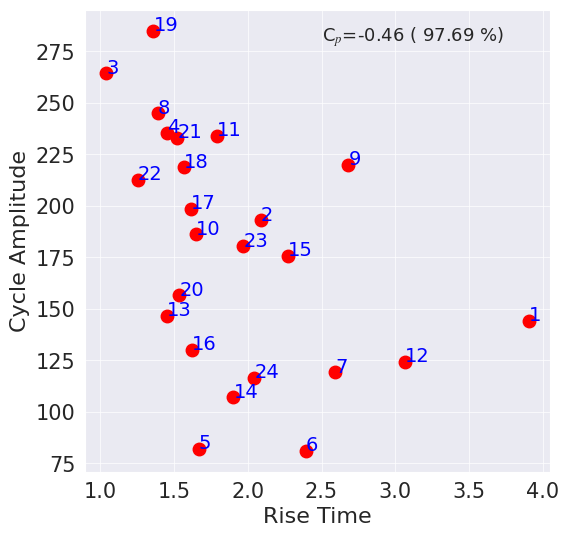

In [110]:
rise_time_karak= time_8P - time_2P
cycle_amplitude_karak= height1
r, p = sp.stats.pearsonr(rise_time_karak, cycle_amplitude_karak)
#print(f"Pearson's correlation coefficient = {r : 0.3f} ({(1 - p) * 100 : 0.3f} %)")

plt.figure(figsize = (6, 6))
plt.plot(rise_time_karak, cycle_amplitude_karak, marker = 'o', ls='', color = 'red', markersize = 9)
#plt.text(10, 87, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
for x, y, z in zip(rise_time_karak, cycle_amplitude_karak, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)
plt.xlabel('Rise Time')
plt.ylabel('Cycle Amplitude')
plt.text(2.5, 280, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
plt.show()

Here, we calculate the rise time by taking the difference between Maximum and Minimum of the cycle.

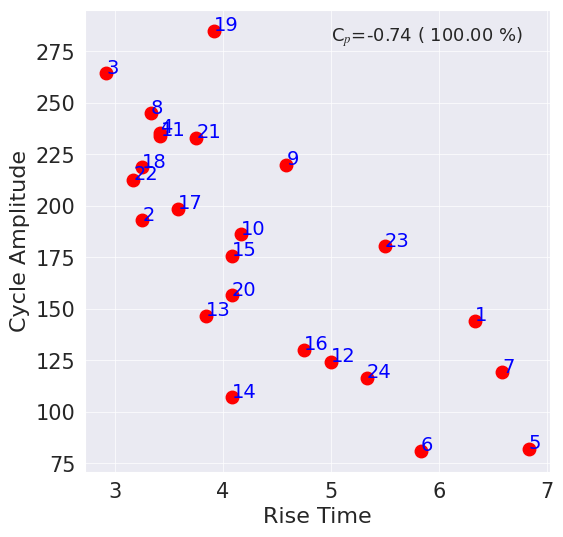

In [114]:
rr, pp = sp.stats.pearsonr(t_rise, cycle_amplitude)
#print(f"Pearson's correlation coefficient = {r : 0.3f} ({(1 - p) * 100 : 0.3f} %)")

plt.figure(figsize = (6, 6))
plt.plot(t_rise, cycle_amplitude, marker = 'o', ls='', color = 'red', markersize = 9)
#plt.text(10, 87, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
for x, y, z in zip(t_rise, cycle_amplitude, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)
plt.xlabel('Rise Time')
plt.ylabel('Cycle Amplitude')
plt.text(5, 280, f'C$_p$={rr : 0.2f} ({(1 - pp) * 100 : 0.2f} %)', fontsize = 13)
plt.show()

Next, we calculate the rise rate of the sunspot cycle by taking the maximum and minimum values of the solar cycle.

In [127]:
nums=len(max_position)
m_ssn=np.zeros(nums)
c_ssn=np.zeros(nums)
for n in range(nums):
  time_cyc= frac_time_year[min_position_index[n]:max_position_index[n]]
  cycleamp_cyc= sunspot_number_13[min_position_index[n]:max_position_index[n]]
  deg=1
  fit_ss=np.polyfit(time_cyc, cycleamp_cyc, deg)
  m_ssn[n]=fit_ss[0] #Gradient
  c_ssn[n]=fit_ss[1] #Intercept

m_ssn, c_ssn

(array([20.58452375, 52.92651968, 96.09589261, 78.27730712, 13.57871319,
        13.15636831, 20.67251918, 83.99856897, 40.89376354, 52.9633674 ,
        69.10770133, 23.97305787, 42.92688696, 29.39269159, 41.15380277,
        29.23468817, 55.94072082, 70.17387719, 91.28616588, 43.31500644,
        68.00058867, 79.10106325, 37.31364387, 23.44132707]),
 array([ -36126.24431068,  -93485.48756657, -170653.49917776,
        -139709.85872851,  -24416.22464734,  -23833.81330203,
         -37700.10475205, -154069.85174326,  -75397.82831444,
         -98322.34999281, -129056.6184335 ,  -45032.88354423,
         -81134.58417757,  -55909.05882543,  -78761.58190471,
         -56225.50845419, -108198.68120679, -136446.70856413,
        -178429.24613488,  -85105.78465633, -134405.91793038,
        -157166.92016043,  -74488.97369989,  -47094.30459441]))

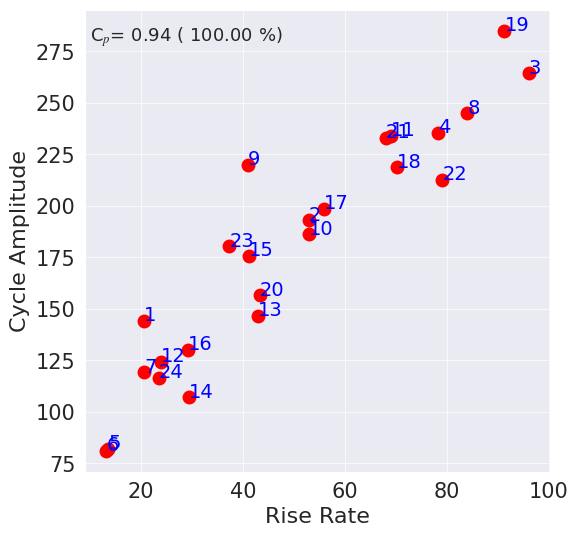

In [129]:
rise_rate= m_ssn

rf, pf = sp.stats.pearsonr(rise_rate, cycle_amplitude)
#print(f"Pearson's correlation coefficient = {r : 0.3f} ({(1 - p) * 100 : 0.3f} %)")

plt.figure(figsize = (6, 6))
plt.plot(rise_rate, cycle_amplitude, marker = 'o', ls='', color = 'red', markersize = 9)
#plt.text(10, 87, f'C$_p$={r : 0.2f} ({(1 - p) * 100 : 0.2f} %)', fontsize = 13)
for x, y, z in zip(rise_rate, cycle_amplitude, cycle_number):
    plt.text(x, y, str(z), color="blue", fontsize=14)
plt.xlabel('Rise Rate')
plt.ylabel('Cycle Amplitude')
plt.text(10, 280, f'C$_p$={rf : 0.2f} ({(1 - pf) * 100 : 0.2f} %)', fontsize = 13)
plt.show()


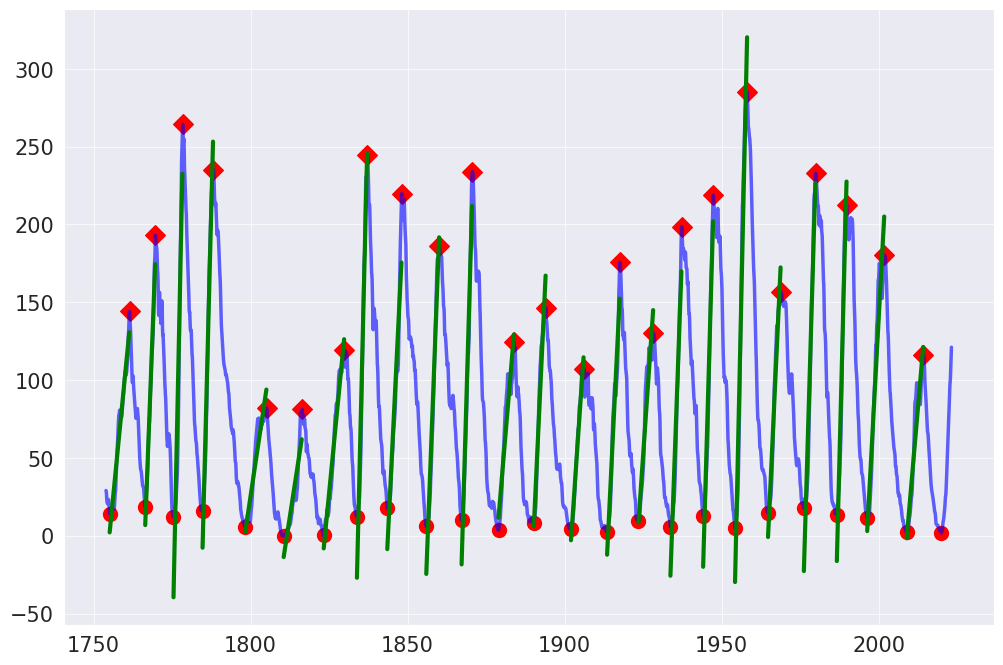

In [131]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(frac_time_year,sunspot_number_13,linewidth = 2.5, alpha=0.6, color='blue', linestyle='-')

peaks1 = find_peaks(sunspot_number_13, height = 50, distance = 80)
height1 = peaks1[1]['peak_heights'] #list containing the height of the peaks
peak_pos1 = frac_time_year[peaks1[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos1, height1, color = 'r', s = 100, marker = 'D')

peaks2 = find_peaks(-np.abs(sunspot_number_13), height = -20, distance = 80)
height2 = peaks2[1]['peak_heights'] #list containing the height of the peaks
peak_pos2 = frac_time_year[peaks2[0]]   #list containing the positions of the peaks
plt.scatter(peak_pos2, -height2, color = 'r', s = 400, marker = '.')


nums=len(max_position)
for n in range(nums):
  time_cyc= frac_time_year[min_position_index[n]:max_position_index[n]]
  cycleamp_cyc= sunspot_number_13[min_position_index[n]:max_position_index[n]]
  deg=1
  fit_ss=np.polyfit(time_cyc, cycleamp_cyc, deg)
  model_ss= fit_ss[0]*time_cyc + fit_ss[1]
  plt.plot(time_cyc, model_ss, linewidth = 3, c='g')